# Main Library

In [1]:
# Reading Data
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Data Preprocessing
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Building Model
import tensorflow.keras as k
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D, AveragePooling2D

# Download Model
import pickle

## Reading Data

In [2]:
path_image = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Bollywood_celeb_face_localized"

class_name = os.listdir(path_image)

image_data = []
label = []

count = 0
for file in class_name:
    image_path = os.listdir(path_image + "\\" + file)
    print(f"Loading -- {file}")
    for img in image_path:
        image = cv2.imread(path_image + "\\" + file + "\\" + img)
        image = cv2.resize(image, (224, 224))
        image_data.append(image)
        label.append(count)
    count += 1

print(" ------ Done ------- ")
print(len(image_data), len(label))

Loading -- Aamir_Khan
Loading -- Abhay_Deol
Loading -- Abhishek_Bachchan
Loading -- Aftab_Shivdasani
Loading -- Aishwarya_Rai
Loading -- Ajay_Devgn
Loading -- Akshaye_Khanna
Loading -- Akshay_Kumar
Loading -- Alia_Bhatt
Loading -- Ameesha_Patel
Loading -- Amitabh_Bachchan
Loading -- Amrita_Rao
Loading -- Amy_Jackson
Loading -- Anil_Kapoor
Loading -- Anushka_Sharma
Loading -- Anushka_Shetty
Loading -- Arjun_Kapoor
Loading -- Arjun_Rampal
Loading -- Arshad_Warsi
Loading -- Asin
Loading -- Ayushmann_Khurrana
Loading -- Bhumi_Pednekar
Loading -- Bipasha_Basu
Loading -- Bobby_Deol
Loading -- Deepika_Padukone
Loading -- Disha_Patani
Loading -- Emraan_Hashmi
Loading -- Esha_Gupta
Loading -- Farhan_Akhtar
Loading -- Govinda
Loading -- Hrithik_Roshan
Loading -- Huma_Qureshi
Loading -- Ileana_DCruz
Loading -- Irrfan_Khan
Loading -- Jacqueline_Fernandez
Loading -- John_Abraham
Loading -- Juhi_Chawla
Loading -- Kajal_Aggarwal
Loading -- Kajol
Loading -- Kangana_Ranaut
Loading -- Kareena_Kapoor
Loa

In [3]:
data = np.array(image_data)
data = data.astype("float32")
data = data / 255.0

print(data.shape, len(class_name))

(8571, 224, 224, 3) 100


In [4]:
label_name = to_categorical(label, len(class_name))
label_name[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## Make Shuffle & Splitting Data

In [5]:
x_img, y_img = shuffle(data, label_name)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.7, random_state=42)

## Visualize Some Data

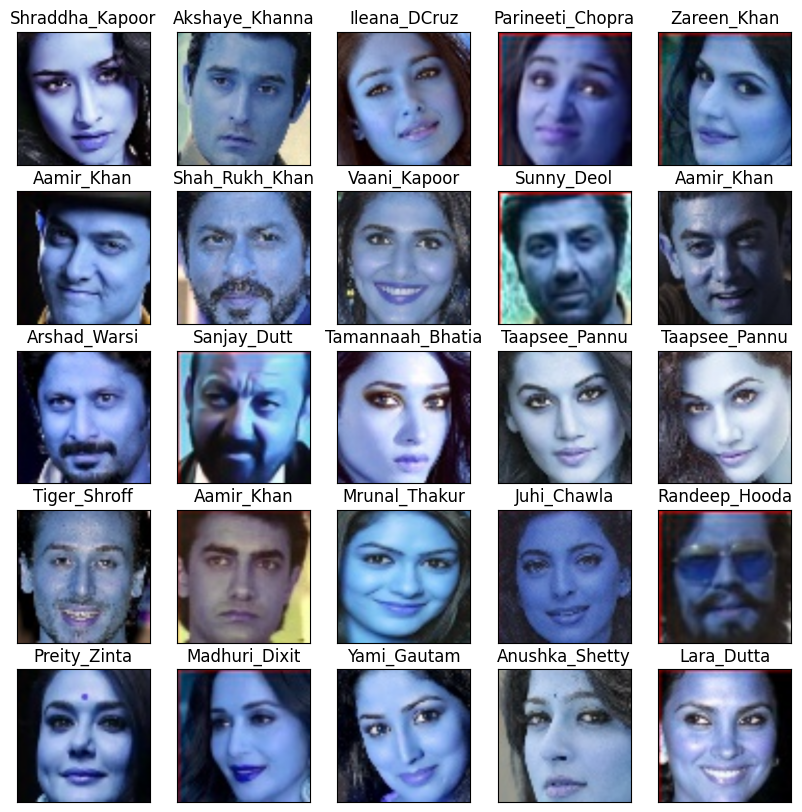

In [6]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

## ----------------------------------------------------------------------------------------------------------------------------
## ----------------------------------------------------------------------------------------------------------------------------
## ----------------------------------------------------------------------------------------------------------------------------

# Building Model

In [8]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(224, 224, 3), padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="relu",  padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Conv2D(256, (2, 2), activation="relu", padding="same"))

model.add(k.layers.Conv2D(512, (2, 2), activation="relu", padding="same"))

model.add(k.layers.Conv2D(1024, (2, 2), activation="relu", padding="same"))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(1024, activation="relu"))
model.add(k.layers.Activation("relu"))
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(512, activation="relu"))
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(len(class_name), activation="softmax"))

model.compile(optimizer="nadam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 16)      1216      
                                                                 
 average_pooling2d_2 (Avera  (None, 112, 112, 16)      0         
 gePooling2D)                                                    
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 32)      8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 average_pooling2d_3 (Avera  (None, 28, 28, 64)       

In [9]:
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), validation_split=0.4)

110/188 [================>.............] - ETA: 4:32 - loss: 4.6070 - accuracy: 0.0122

KeyboardInterrupt: 

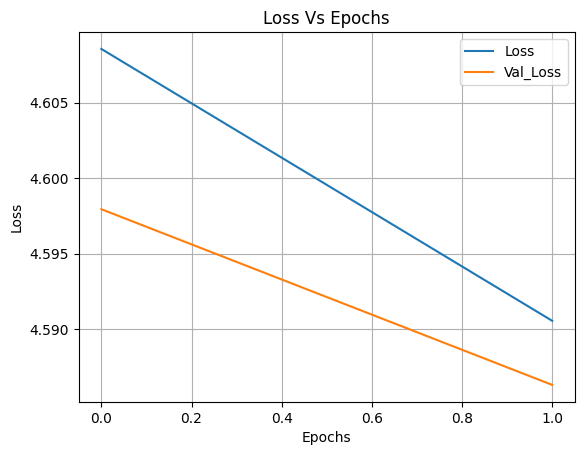

In [25]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

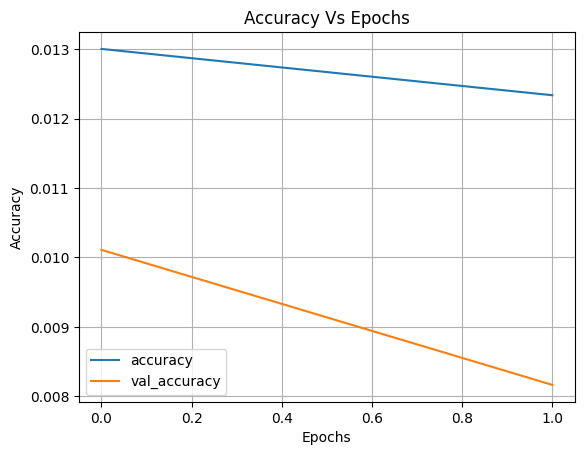

In [26]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [27]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {round(accuracy, 4)} %")
print(f"The loss Testing Data is ==> {round(loss, 4)}")

81/81 [==============================] - 8s 103ms/step - loss: 4.5863 - accuracy: 0.0082
The Accuracy Testing Data is ==> 0.0082 %
The loss Testing Data is ==> 4.5863


# Building Pretraining Model -- Mobile_net

In [28]:
model_mobilenet = tf.keras.applications.mobilenet.MobileNet()

In [29]:
model_1 = k.models.Sequential()
for layer in model_mobilenet.layers[:-1]:
    model_1.add(layer)
for layers in model_1.layers:
    layers.trainable = False

In [30]:
model_1.add(Dense(len(class_name), activation="softmax"))
model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128       
 zation)                                                         
                                                      

 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )                                                               
                                                                 
 conv_dw_9

In [31]:
model_1.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), validation_split=0.4)

Epoch 1/2
188/188 [==============================] - 96s 495ms/step - loss: 5.3688 - accuracy: 0.0827 - val_loss: 4.6276 - val_accuracy: 0.1271
Epoch 2/2
188/188 [==============================] - 90s 480ms/step - loss: 3.2883 - accuracy: 0.2684 - val_loss: 3.7791 - val_accuracy: 0.2251


In [32]:
loss, accuracy = model_1.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {round(accuracy, 4)} %")
print(f"The loss Testing Data is ==> {round(loss, 4)}")

81/81 [==============================] - 26s 320ms/step - loss: 3.7791 - accuracy: 0.2251
The Accuracy Testing Data is ==> 0.2251 %
The loss Testing Data is ==> 3.7791


# Building Pretraining Model -- VGG19

In [38]:
model_B7 = k.applications.vgg19.VGG19()

In [39]:
model_2 = k.models.Sequential()
for layer in model_B7.layers[:-1]:
    model_2.add(layer)
for layers in model_2.layers:
    layers.trainable = False

In [40]:
model_2.add(Dense(len(class_name), activation="softmax"))
model_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [41]:
model_2.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), validation_split=0.4)

Epoch 1/2
188/188 [==============================] - 645s 3s/step - loss: 5.1882 - accuracy: 0.0178 - val_loss: 5.0904 - val_accuracy: 0.0311
Epoch 2/2
188/188 [==============================] - 636s 3s/step - loss: 4.7269 - accuracy: 0.0348 - val_loss: 4.7221 - val_accuracy: 0.0272


In [42]:
loss, accuracy = model_2.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {round(accuracy, 4)} %")
print(f"The loss Testing Data is ==> {round(loss, 4)}")

81/81 [==============================] - 188s 2s/step - loss: 4.7221 - accuracy: 0.0272
The Accuracy Testing Data is ==> 0.0272 %
The loss Testing Data is ==> 4.7221
